# Data Collection & Preparation

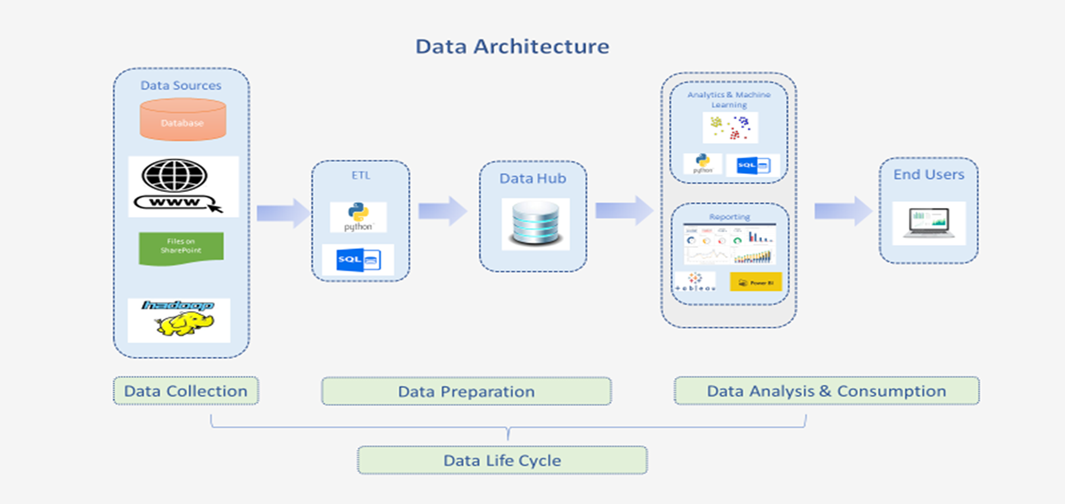


## 1.Import python packages

In [66]:
import pandas as pd
import numpy as np
import os
file_path='C:/Business_Data_Analysis/data/'
# file_path=os.environ['USERPROFILE']+'/Business_Data_Analysis/'

# %pip install nbconvert

## 2.Establish connection to database

In [67]:
import pyodbc
import urllib
import sqlalchemy

'''sources databases'''
params_p = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=DataWarehouse1;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_p = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_p))


params_s = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=DataWarehouse2;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_s = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_s))



'''destination databases'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

## 3.back up your data

In [51]:
# '''get historical data from source database'''
# df_sales_p=pd.read_sql_table('sales_data_primary',engine_p)

# from datetime import datetime
# dateTimeObj = datetime.now()
# timestampStr = dateTimeObj.strftime("%d-%m-%Y-%H-%M-%S")
# print('Current Timestamp : ', timestampStr)

# df_sales_p.to_csv(file_path+'data/sales_data_primary_backup_'+timestampStr+'.csv',index=False)

## 4.ETL data to datahub

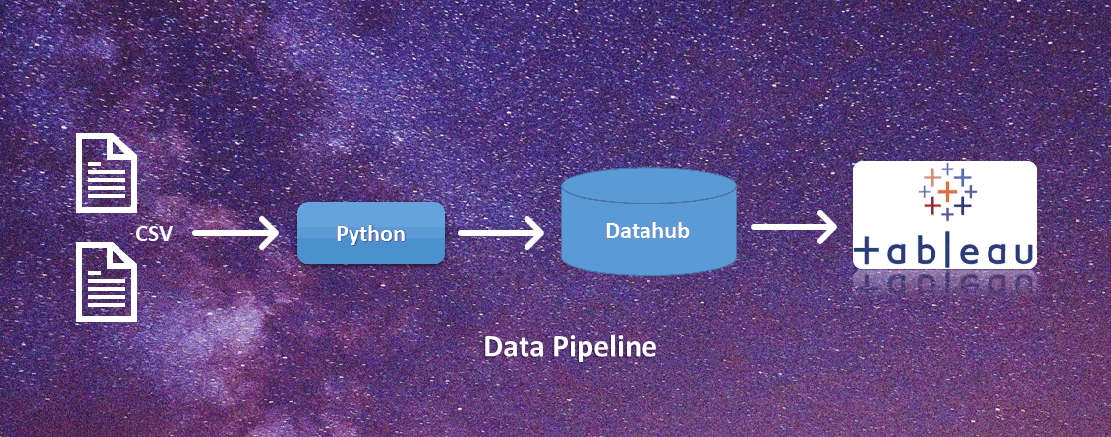

In [52]:
df=pd.read_csv(file_path+'YR_Data.csv')

df.to_sql('gov',engine_datahub,if_exists='replace',index=False)

## a. Append new data to historical data

### i. Option 1: using python

In [53]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y')
'''get new data'''
df_new=pd.read_csv(file_path+'new_data.csv')

In [54]:
df_new.shape

(81, 9)

In [55]:
'''get historical data from source database'''
df_gov=pd.read_sql_table('gov',engine_datahub)
df_gov.shape

(98230, 9)

In [56]:
'''append new data to historical data'''
df_all=pd.concat([df_gov,df_new])
df_all.shape

(98311, 9)

In [58]:
'''drop duplicates'''
df_all.drop_duplicates(keep='first', inplace = True)

df_all

,Case Count,Gender,Age Decade,Municipality,Community,Date Reported,Estimated Date of Onset,Acquisition,Status
0,75762,Female,30s,Richmond Hill,Pending Neighbourhood,2/29/2020,2/25/2020,Workplace Outbreak,Resolved
1,75768,Female,60s,Richmond Hill,Pending Neighbourhood,3/2/2020,2/23/2020,Workplace Outbreak,Resolved
2,75767,Female,70s,Richmond Hill,Pending Neighbourhood,3/3/2020,2/22/2020,Workplace Outbreak,Resolved
3,75765,Male,50s,Vaughan,Maple,3/4/2020,2/27/2020,Workplace Outbreak,Resolved
4,75766,Male,40s,Richmond Hill,Pending Neighbourhood,3/4/2020,2/28/2020,Workplace Outbreak,Resolved
...,...,...,...,...,...,...,...,...,...
76,38856,Male,Under 20,King,Pending Neighbourhood,3/3/2022,3/3/2022,Under Investigation,Self-Isolating
77,38860,Male,60s,Vaughan,Maple,3/3/2022,3/3/2022,Under Investigation,Self-Isolating
78,38871,Male,20s,Richmond Hill,Pending Neighbourhood,3/3/2022,3/3/2022,Under Investigation,Self-Isolating
79,38872,Male,80s,Markham,Pending Neighbourhood,3/3/2022,3/3/2022,Under Investigation,Self-Isolating


### ii. Check data

In [59]:
df_gov.shape

(98230, 9)

In [60]:
df_all.shape

(98311, 9)

In [61]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98311 entries, 0 to 80
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Case Count               98311 non-null  int64 
 1   Gender                   98311 non-null  object
 2   Age Decade               98310 non-null  object
 3   Municipality             98311 non-null  object
 4   Community                98311 non-null  object
 5   Date Reported            98311 non-null  object
 6   Estimated Date of Onset  98311 non-null  object
 7   Acquisition              98311 non-null  object
 8   Status                   98311 non-null  object
dtypes: int64(1), object(8)
memory usage: 7.5+ MB


In [63]:
df_all['Date Reported'] = pd.to_datetime(df_all['Date Reported'])
df_all['Estimated Date of Onset'] = pd.to_datetime(df_all['Estimated Date of Onset'])

In [46]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98312 entries, 0 to 80
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Case Count               98311 non-null  float64       
 1   Gender                   98311 non-null  object        
 2   Age Decade               98310 non-null  object        
 3   Municipality             98311 non-null  object        
 4   Community                98311 non-null  object        
 5   Date Reported            98311 non-null  datetime64[ns]
 6   Estimated Date of Onset  98311 non-null  datetime64[ns]
 7   Acquisition              98311 non-null  object        
 8   Status                   98311 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 7.5+ MB


In [64]:
df_all.head()

,Case Count,Gender,Age Decade,Municipality,Community,Date Reported,Estimated Date of Onset,Acquisition,Status
0,75762,Female,30s,Richmond Hill,Pending Neighbourhood,2020-02-29,2020-02-25,Workplace Outbreak,Resolved
1,75768,Female,60s,Richmond Hill,Pending Neighbourhood,2020-03-02,2020-02-23,Workplace Outbreak,Resolved
2,75767,Female,70s,Richmond Hill,Pending Neighbourhood,2020-03-03,2020-02-22,Workplace Outbreak,Resolved
3,75765,Male,50s,Vaughan,Maple,2020-03-04,2020-02-27,Workplace Outbreak,Resolved
4,75766,Male,40s,Richmond Hill,Pending Neighbourhood,2020-03-04,2020-02-28,Workplace Outbreak,Resolved


### iii. Export updated historical data to database

In [65]:
df_all.to_sql("gov", engine_datahub,if_exists='replace',index=False)

# Publish data to tableau server

In [19]:
# %pip install pantab
# %pip install numpy --upgrade
# %pip install tableau_api_lib
# %pip install tableauserverclient

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#===================================================================
#Title: Publish Tableau Hyper Extract
#Authors: 
#Date: 2022-08-09
#Description: The code below shows an example of publishing a dataframe to Tableau using the Hyper API.
#===================================================================
import pandas as pd
import numpy as np
# import hvac
import sqlalchemy
import urllib
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

from datetime import datetime

#Used for database
import pyodbc

#Used for publishTableau
import pantab
from tableauhyperapi import HyperProcess, Connection, TableDefinition, SqlType, Telemetry, Inserter, CreateMode, TableName
from tableauhyperapi import escape_string_literal
from tableau_api_lib import TableauServerConnection
from tableau_api_lib.utils.querying import get_projects_dataframe
import tableauserverclient as TSC
import os
file_path='C:/Business_Data_Analysis/data/'
from pathlib import Path

In [21]:
# '''sources databases'''
# params_p = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
#                                  "SERVER=localhost\SQLEXPRESS;"
#                                  "DATABASE=DataWarehouse1;"
#                                  "UID=sa;"
#                                  "PWD=user1")

# engine_p = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_p))


# params_s = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
#                                  "SERVER=localhost\SQLEXPRESS;"
#                                  "DATABASE=DataWarehouse2;"
#                                  "UID=sa;"
#                                  "PWD=user1")

# engine_s = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_s))



# '''destination databases'''

# params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
#                                  "SERVER=localhost\SQLEXPRESS;"
#                                  "DATABASE=datahub;"
#                                  "UID=sa;"
#                                  "PWD=user1")

# engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

In [22]:
#ETL data to datahub

# df_Facebook_Data_Paid_Social=pd.read_excel(file_path+'Facebook_Data_Paid_Social.xlsx')

# df_Facebook_Data_Paid_Social.to_sql('Paid_Social',engine_datahub,if_exists='replace',index=False)

# df_PPC=pd.read_excel(file_path+'PPC.xlsx')

# df_PPC.to_sql('PPC',engine_datahub,if_exists='replace',index=False)

In [23]:
#Append new data to historical data

# from datetime import datetime


# '''get new data'''
# df_Facebook_Data_Paid_Social_new=pd.read_excel(file_path+'Facebook_Data_Paid_Social_new.xlsx')

# '''get historical data from source database'''
# df_Facebook_Data_Paid_Social=pd.read_sql_table('Paid_Social',engine_datahub)

# '''append new data to historical data'''
# df_Facebook_Data_Paid_Social_all=pd.concat([df_Facebook_Data_Paid_Social,df_Facebook_Data_Paid_Social_new])

# '''drop duplicate'''
# df_Facebook_Data_Paid_Social_all.drop_duplicates(keep='first', inplace=True)

# # df_Facebook_Data_Paid_Social_all

# '''get new data'''
# df_PPC_new=pd.read_excel(file_path+'PPC_new.xlsx')

# '''get historical data from source database'''
# df_PPC=pd.read_sql_table('PPC',engine_datahub)

# '''append new data to historical data'''
# df_PPC_all=pd.concat([df_PPC,df_PPC_new])

# '''drop duplicate'''
# df_PPC_all.drop_duplicates(keep='first', inplace=True)

# df_PPC_all

In [24]:
# Export updated historical data to database

# df_PPC_all.to_sql("PPC", engine_datahub,if_exists='replace',index=False)

# df_Facebook_Data_Paid_Social_all.to_sql("Paid_Social", engine_datahub,if_exists='replace',index=False)

In [3]:
#Script configuration. Generate a UUID and enter it below.
taskID = '001'
taskName = 'PublishTableau - Test'
logID = '' #Default, use for DEV
#logID = '' #Use this one for PRODUCTION
startTime = datetime.now()

server='https://10az.online.tableau.com/'
username='YC'
token='IAXtW7e1R4yr8fJRisV6/Q==:ghmvQgQw1HJwSGAe29EIuhdEI6PXyNxx' 
siteName='sutterhealth'
projectName='default'
scr_table='gov'
dest_table='gov'


#===================================================================
#Standard log writer
#Logging function
def writeLog(taskStatus, taskMessage, endTime = None):
    log_engine = connectSQLServer1()
    if endTime == None:
        endTime = datetime.now()
    logColumns = ['TaskID', 'TaskName','Status','Message','StartTime','EndTime']
    df = pd.DataFrame([[taskID, taskName, taskStatus, taskMessage, startTime, endTime]], columns=logColumns)
    df.to_sql('Python_Logging', log_engine, if_exists='append', index=False)

#===================================================================    
#Connection Functions
#SQL Server Connection

def connectSQLServer1():
    SQLConn = "DRIVER={SQL Server Native Client 11.0};""SERVER=localhost\SQLEXPRESS;""DATABASE=datahub;""UID=sa;""PWD=user1"
    SQLparams = urllib.parse.quote_plus(SQLConn)
    SQLEngine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % SQLparams)
    return SQLEngine


#Tableau Connection - Requires pantab, tableauhyperapi, tableau_api_lib, tableauserverclient
def publishTableau(server,token,siteName, projectName, dest_table, df):
    #Save DataFrame output to .hyper file locally
    fileName = str(Path( "__file__" ).parent.absolute())+ '\\' + dest_table + '.hyper'
    pantab.frame_to_hyper(df, fileName, table = dest_table)
    
    #Connect to our Tableau Instance
    tableau_auth = TSC.PersonalAccessTokenAuth(username, token, siteName)
    server = TSC.Server(server)
    server.add_http_options({'verify': False})
    server.use_server_version()

    with server.auth.sign_in(tableau_auth):
        #Define publish mode - Overwrite, Append, or CreateNew
        publishMode = TSC.Server.PublishMode.Overwrite
        
        #Get project_id from project_name
        all_projects, pagination_item = server.projects.get()
        for project in TSC.Pager(server.projects):
            if project.name == projectName:
                project_id = project.id
    
        #Create the datasource object with the project_id
        datasource = TSC.DatasourceItem(project_id)
        
        #Publish datasource
        print(f'{datetime.now()}: Publishing {dest_table} to {projectName}...')
        datasource = server.datasources.publish(datasource, fileName, publishMode)
        print(f'{datetime.now()}: Datasource published. Datasource ID: {format(datasource.id)}')
    
    if os.path.exists(fileName):
        os.remove(fileName)
        print(f'{datetime.now()}: Removed file {fileName} from local')

#===============================================================
try:
    print(f'{startTime}: Script starting.')

    #Example Teradata Connection
    engine = connectSQLServer1()
    queryText2 =f"""
        SELECT * from {scr_table}   
    """
    outputdata = pd.read_sql(queryText2, engine)
    print(outputdata)

    #Example Publish dataframe to Tableau
    publishTableau(server,token,siteName, projectName, dest_table, outputdata)
    
    #Example Teradata Connection
#     engine = connectSQLServer1()
#     queryText2 =f"""
#         SELECT * from PPC   
#     """
#     outputdata = pd.read_sql(queryText2, engine)
#     print(outputdata)

#     #Example Publish dataframe to Tableau
#     publishTableau(siteName, projectName, tablename, outputdata)

    #Write a "pass" status to the log (uncomment writeLog after GUID is entered):
    taskMessage = 'Logging Template Pass'
    writeLog(True, taskMessage) 
    print(f'{datetime.now()}: Done!')

except Exception as e:
    #Write a "fail" status to the log (uncomment writeLog after GUID is entered):
    taskMessage = str(e)
    print(taskMessage)
    #writeLog(False, taskMessage) 
#===================================================================

2022-12-07 11:55:36.489081: Script starting.
       Case Count  Gender Age Decade   Municipality              Community  \
0         75762.0  Female        30s  Richmond Hill  Pending Neighbourhood   
1         75768.0  Female        60s  Richmond Hill  Pending Neighbourhood   
2         75767.0  Female        70s  Richmond Hill  Pending Neighbourhood   
3         75765.0    Male        50s        Vaughan                  Maple   
4         75766.0    Male        40s  Richmond Hill  Pending Neighbourhood   
...           ...     ...        ...            ...                    ...   
98307     38856.0    Male   Under 20           King  Pending Neighbourhood   
98308     38860.0    Male        60s        Vaughan                  Maple   
98309     38871.0    Male        20s  Richmond Hill  Pending Neighbourhood   
98310     38872.0    Male        80s        Markham  Pending Neighbourhood   
98311     38873.0  Female        20s        Vaughan             Woodbridge   

      Date Reporte

# Data 'gov'  published on Tableau Server Screen Shot

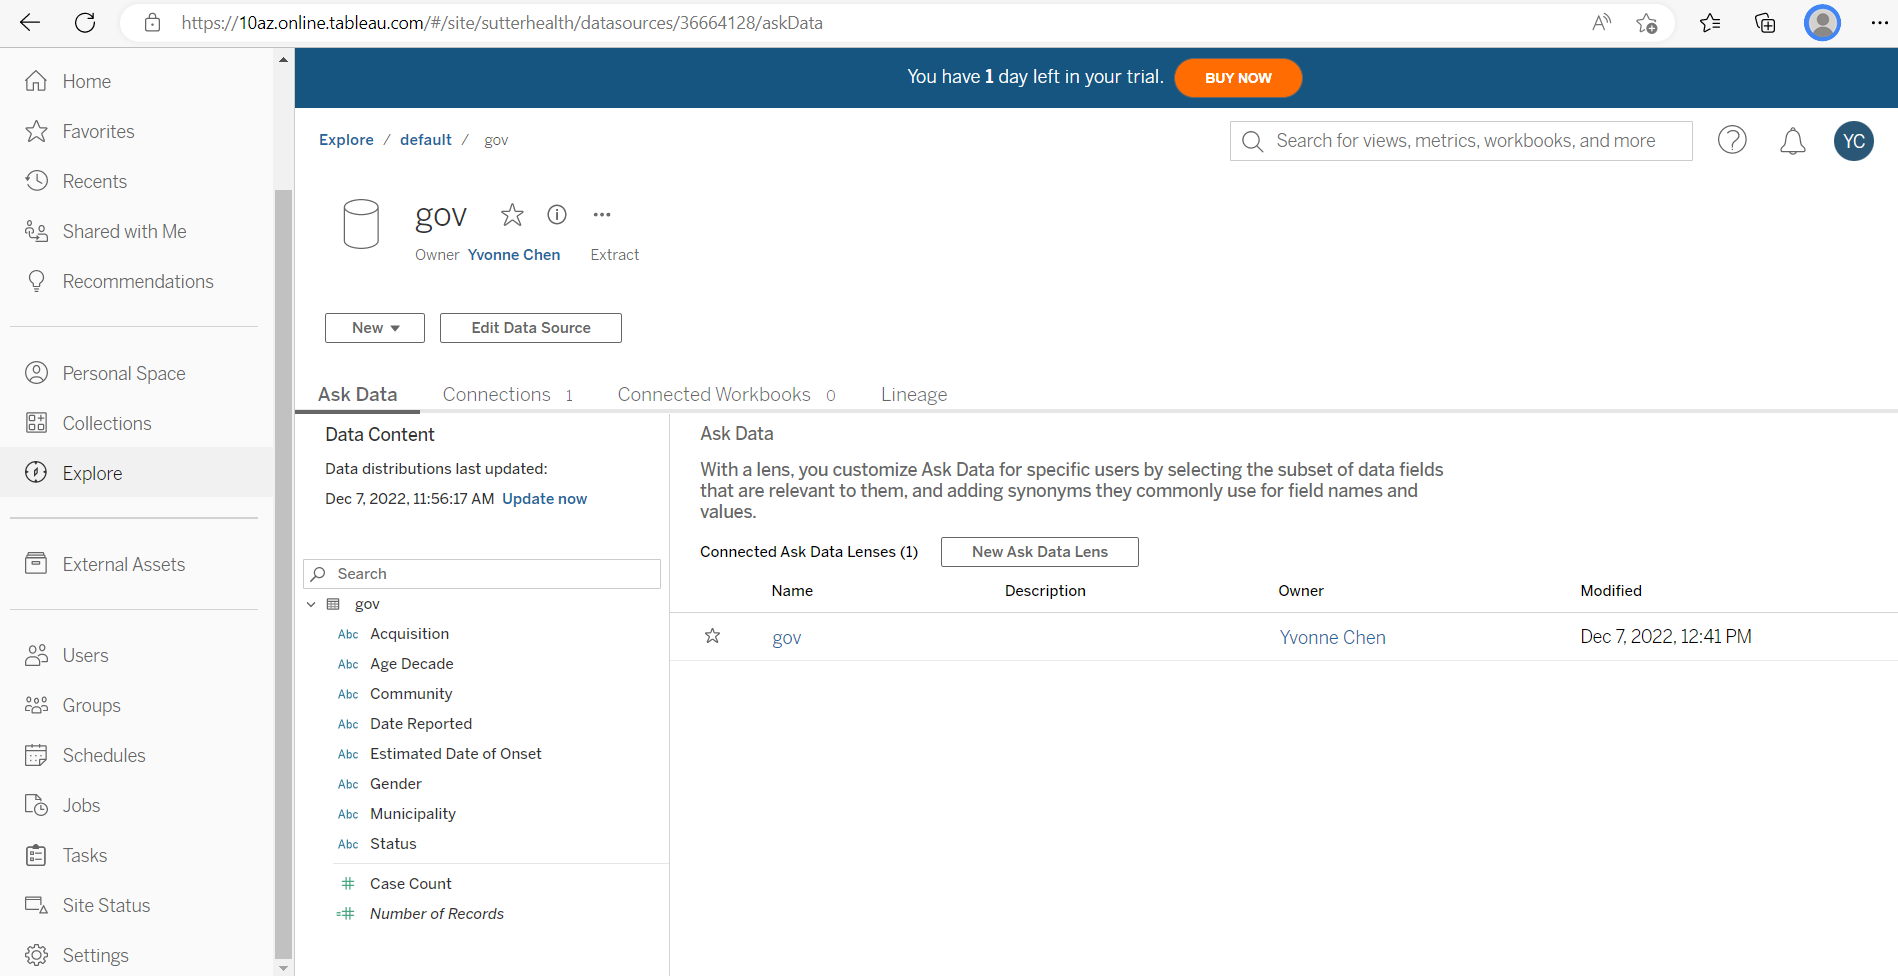

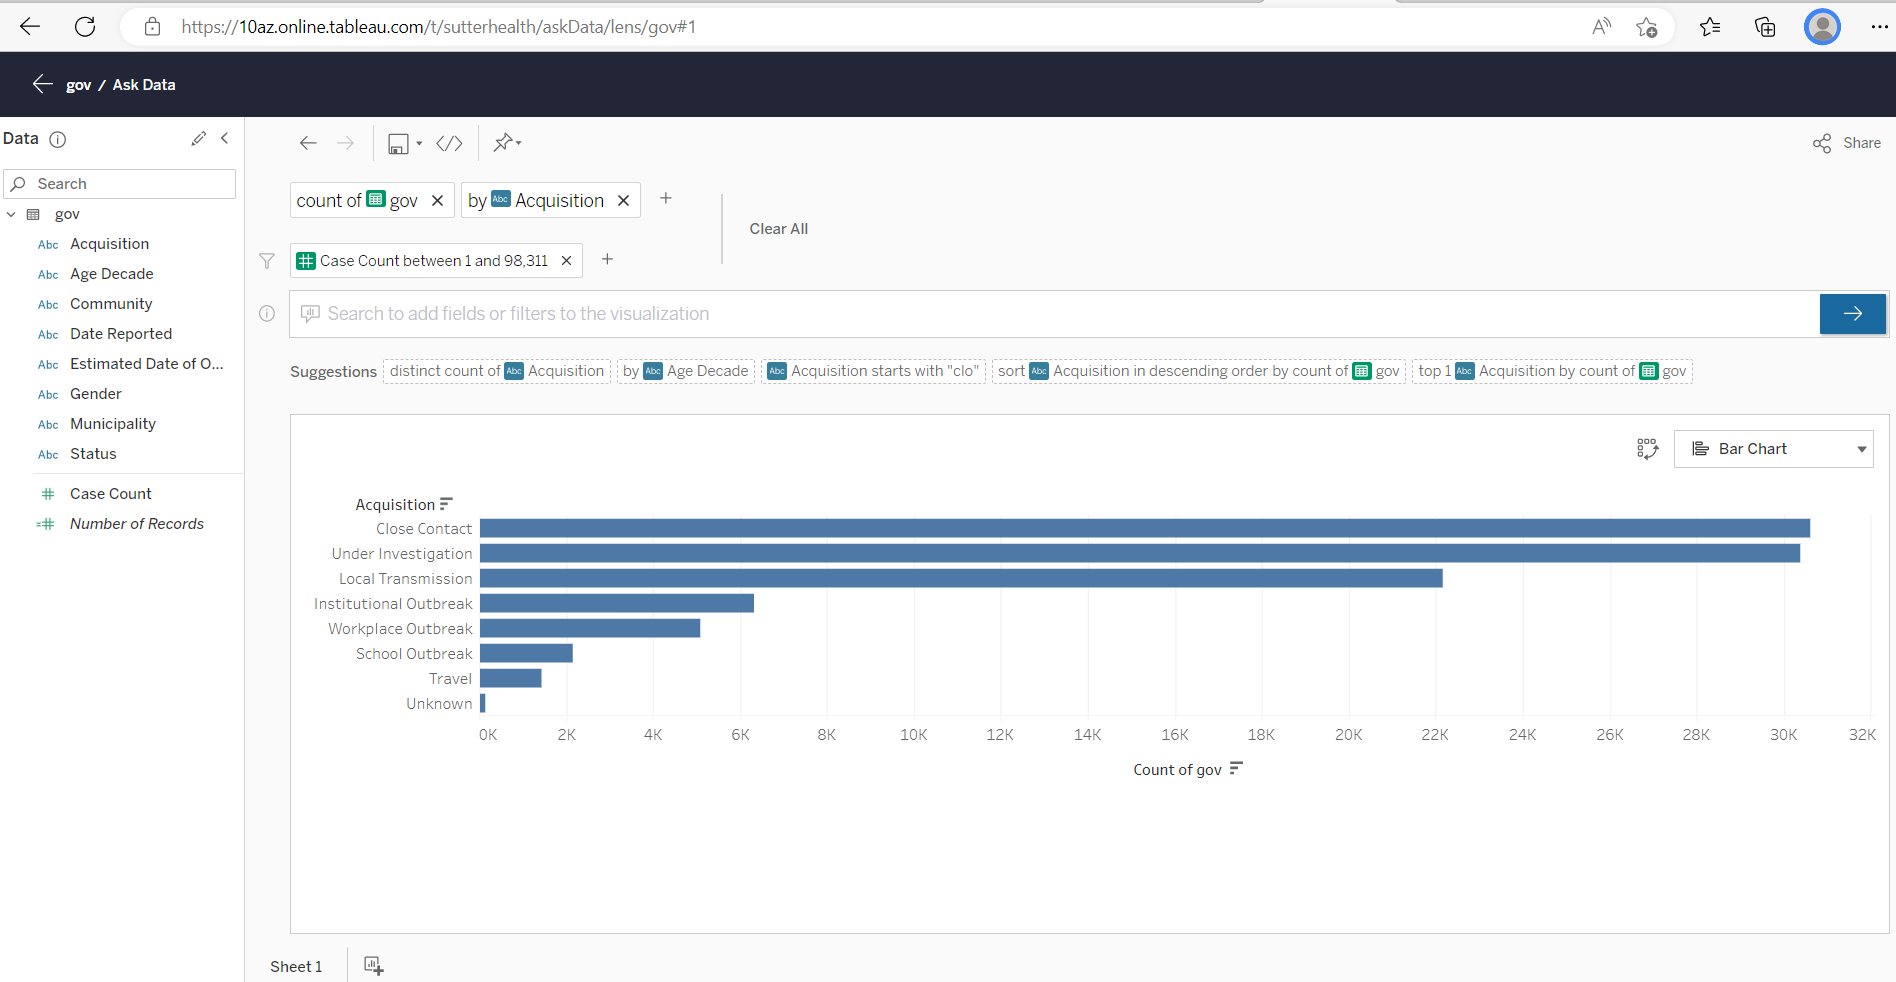